In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('F:\Deets Digital\Python\EV-data\\Electric_Vehicle_Population_Data.csv')

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [4]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [5]:
df1=df.dropna()

In [6]:
df1.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [8]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [9]:
# Top 20 countries by electric vehicle 

ev_count_distributions = df1.groupby('County')['VIN (1-10)'].count().reset_index().sort_values(by = 'VIN (1-10)', ascending = False)
top_20_coutries = ev_count_distributions.head(20)


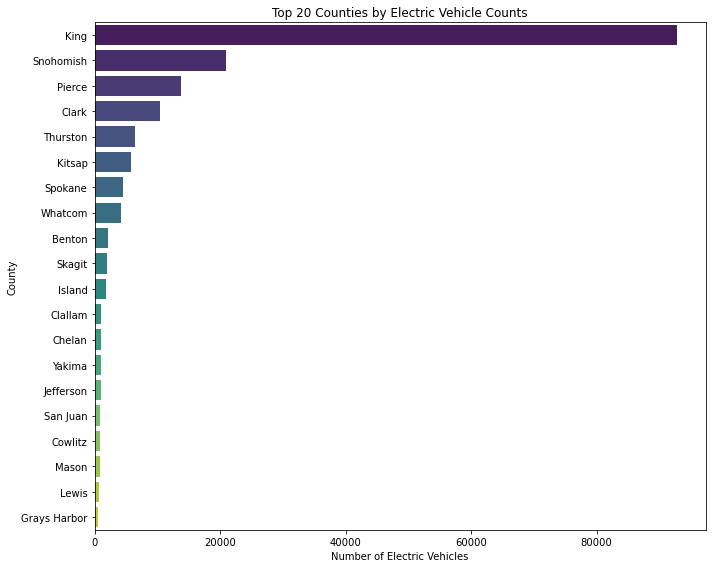

In [10]:
plt.figure(figsize=(10, 8))
sns.barplot(x="VIN (1-10)", y='County', data=top_20_coutries, palette='viridis')
plt.title('Top 20 Counties by Electric Vehicle Counts')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('County')
plt.tight_layout()
plt.show()

In [11]:
# comparing of BEV and PHEV Over years

ev_Bev_Phev = df1[df1['Electric Vehicle Type'].isin(['Battery Electric Vehicle (BEV)','Hybrid Electric Vehicle (PHEV)'])]
yearly_ev_counts =ev_Bev_Phev.groupby('Model Year')['Electric Vehicle Type'].count().reset_index()

<Figure size 720x648 with 0 Axes>

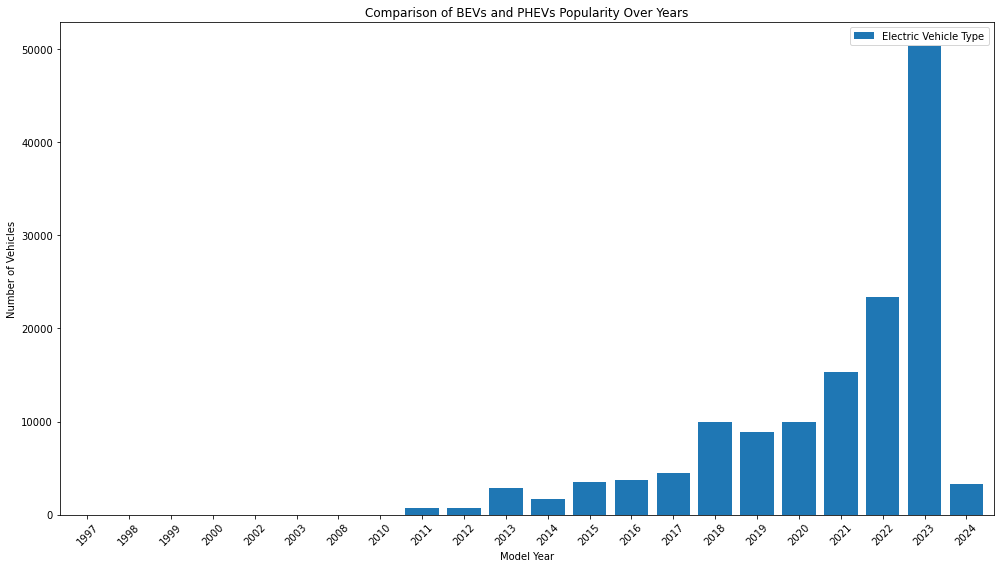

In [12]:
plt.figure(figsize=(10,9))
yearly_ev_counts.plot(kind='bar',stacked = True, x='Model Year',figsize=(14,8),width = 0.8)
plt.title('Comparison of BEVs and PHEVs Popularity Over Years')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

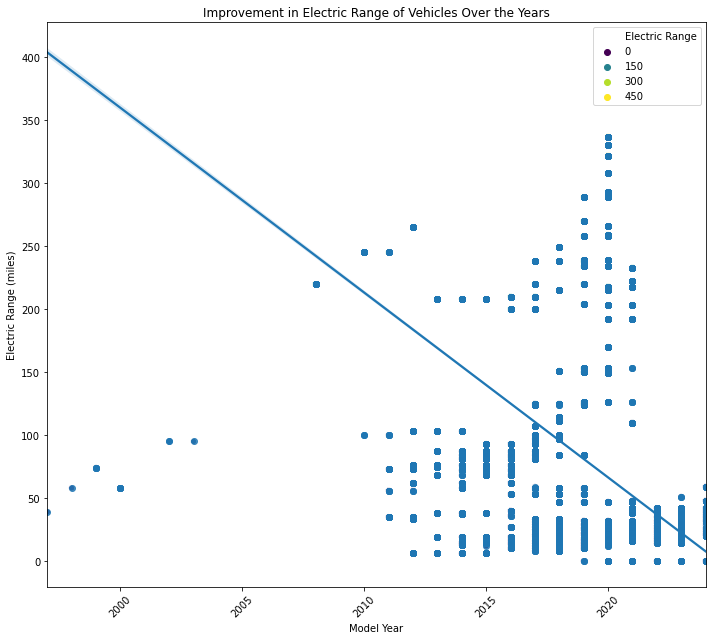

In [13]:
# Improvement of Electric Range of Vehicles over the years
plt.figure(figsize=(10,9))
sns.scatterplot(data = df, x='Model Year', y= 'Electric Range',hue ='Electric Range', palette ='viridis')
sns.regplot(data = df, x='Model Year', y= 'Electric Range')
plt.title('Improvement in Electric Range of Vehicles Over the Years')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


In [14]:
# Distribution of Electric Vehicles Prices over the years

filtered_df = df1[(df1['Base MSRP'] >0) & (df1['Base MSRP']<200000)]

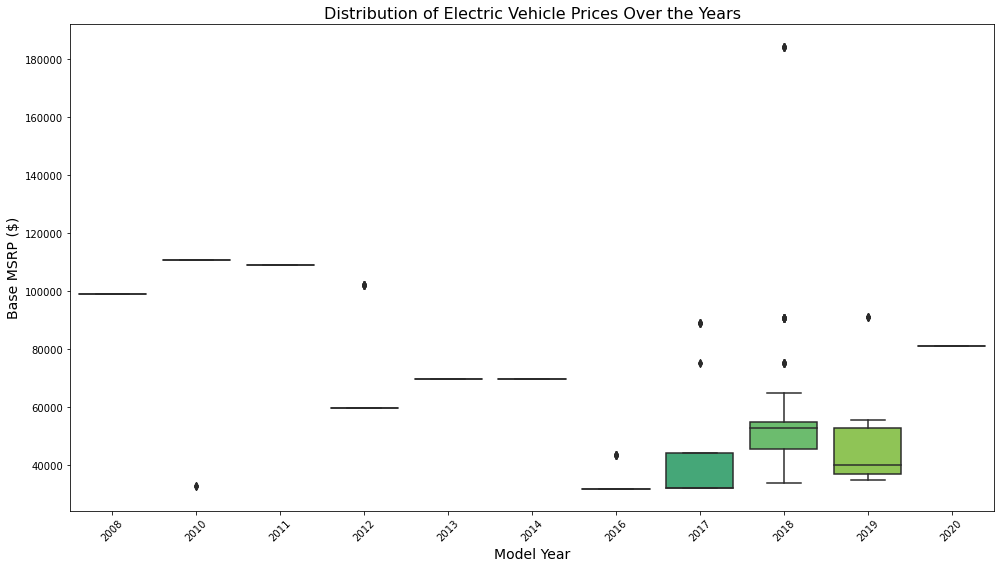

In [15]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_df, x='Model Year', y='Base MSRP', palette="viridis")
plt.title('Distribution of Electric Vehicle Prices Over the Years', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Base MSRP ($)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# Distribution of Electric Vehicles Prices by top 3 make 

top_makes = filtered_df['Make'].value_counts().nlargest(10).index
filtered_top_makes_df = filtered_df[filtered_df['Make'].isin(top_makes)]

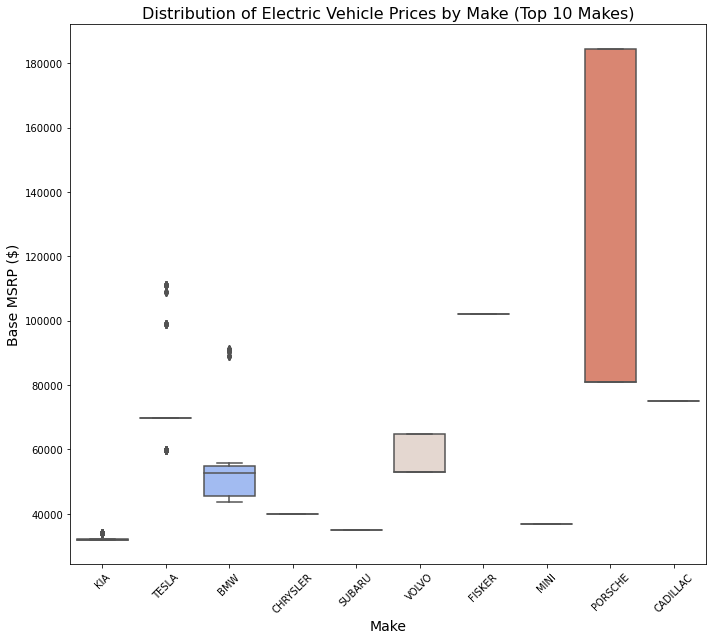

In [21]:
plt.figure(figsize=(10,9))
sns.boxplot(data=filtered_top_makes_df, x='Make', y='Base MSRP', palette="coolwarm")
plt.title('Distribution of Electric Vehicle Prices by Make (Top 10 Makes)', fontsize=16)
plt.xlabel('Make', fontsize=14)
plt.ylabel('Base MSRP ($)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
# Top 10 Electric utilities by number of electric vehicles 

utility_counts = df.groupby('Electric Utility')['DOL Vehicle ID'].count().reset_index().head(10).sort_values(by = 'DOL Vehicle ID', ascending = False)


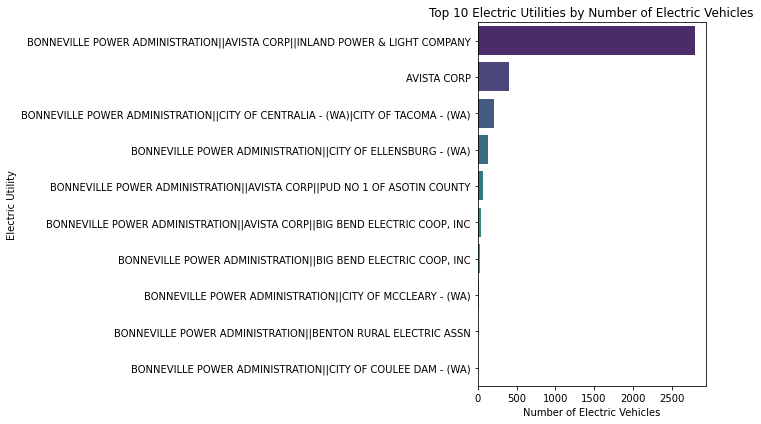

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=utility_counts, x='DOL Vehicle ID', y='Electric Utility', palette='viridis', order=utility_counts['Electric Utility'])

plt.title('Top 10 Electric Utilities by Number of Electric Vehicles')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('Electric Utility')
plt.tight_layout()
plt.show()

In [24]:
# Electric Vehicle by Legislative District

district_counts = df.groupby('Legislative District')['DOL Vehicle ID'].count().reset_index().sort_values(by='DOL Vehicle ID', ascending=False)

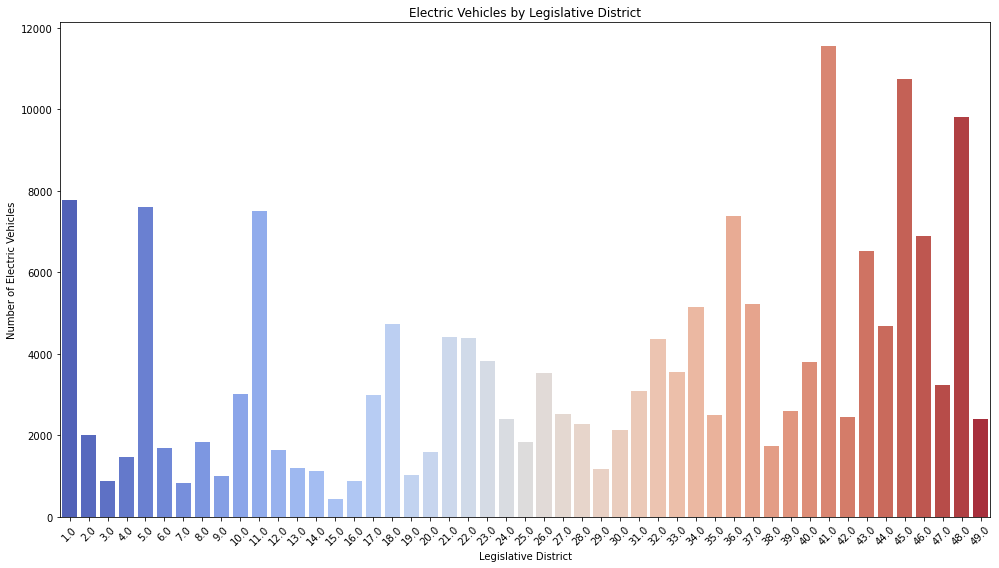

In [25]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Legislative District', y='DOL Vehicle ID', data=district_counts,
            palette='coolwarm')
plt.title('Electric Vehicles by Legislative District')
plt.xlabel('Legislative District')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [44]:
# Top 20 countries by price of EV

In [41]:
location_Price = df.groupby('County')['Base MSRP'].count().reset_index().sort_values(by ='Base MSRP' ,ascending = False)
Top_location_Price = location_Price.head(20)

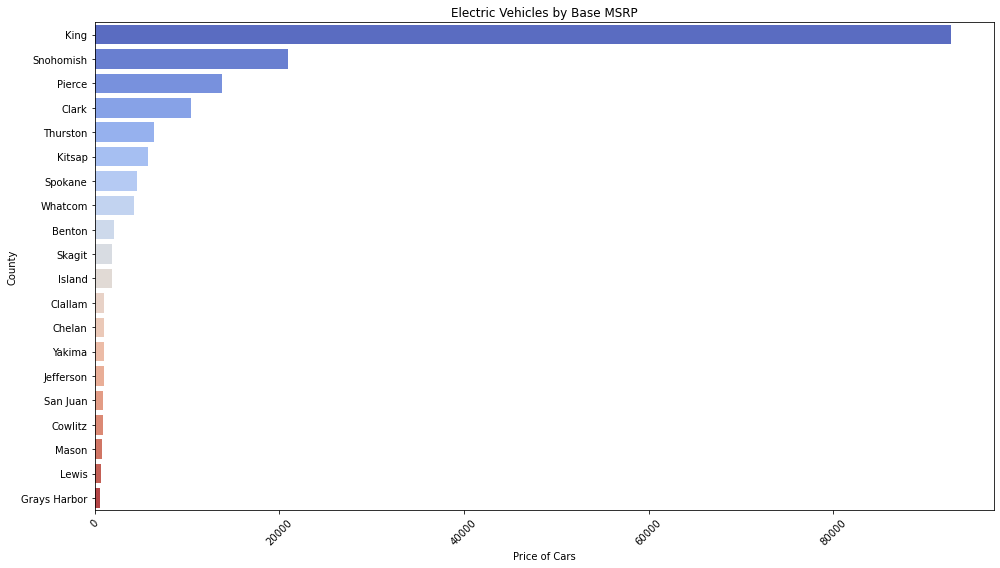

In [42]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Base MSRP', y='County', data=Top_location_Price,
            palette='coolwarm')
plt.title('Electric Vehicles by Base MSRP')
plt.xlabel('Price of Cars')
plt.ylabel('County')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()